In [1]:
import pandas as pd
from pathlib import Path

import math

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/run_BaumBauenNotebooks')



from tb_to_csv import tabulate_metrics
from plot_fcts import curve_plot, multi_metric_bar_plot

In [2]:
data_name = "newBs_TSD_BsXHc_15k_each_6trees_IDs_charge"#"TSD_BsXHc_50k_each_6trees_IDs_charge"

spec = "1024_0.001_128_0.3_8"# "1024_0.001_512_0.3_4" 

In [3]:
plotname_extension = data_name + '_' + spec
nfs_path = "/nfs/dust/belle2/user/axelheim/BranchSeparator/run_BsXHc/"

plot_path = "/afs/desy.de/user/a/axelheim/private/run_BsXHc/"


data_dir = Path((nfs_path + 'tb_logs/' + data_name + '/' + spec))
print("now processing:",data_dir)



csv_dir = Path((nfs_path + 'tb_csv/' + data_name + '/' + spec))
csv_dir.mkdir(parents=True, exist_ok=True)

plot_path = Path((plot_path + 'plots/' + data_name + '/' + spec))
plot_path.mkdir(parents=True, exist_ok=True)

tb_metrics = tabulate_metrics(data_dir, csv_dir)


# choosing the tb_log with the most epochs recorded
epochs = []
for i in range(len(tb_metrics)):
    epochs.append(len(tb_metrics[i]))
    print(epochs[i])

most_epochs_idx = 0
if len(tb_metrics) > 1:
    most_epochs_idx = epochs.index(max(epochs))

print(most_epochs_idx)
print(len(tb_metrics))
#if most_epochs_idx == 0:
    #continue
longest_run = tb_metrics[most_epochs_idx]






now processing: /nfs/dust/belle2/user/axelheim/BranchSeparator/run_BsXHc/tb_logs/newBs_TSD_BsXHc_15k_each_6trees_IDs_charge/1024_0.001_128_0.3_8
Converting run events.out.tfevents.1626427249.batchg011.desy.de.112549.0

Run events.out.tfevents.1626427249.batchg011.desy.de.112549.0 is empty, didn't process it 

Converting run events.out.tfevents.1626427346.batchg011.desy.de.113607.0

- Done
151
0
1


In [4]:
longest_run

,time_stamp,Epoch,Cross Entropy/Validation,Accuracy/Validation,AccClass0/Validation,AccClass1/Validation,AccClass2/Validation,AccClass3/Validation,PerfectSA/Validation,SA1F/Validation,...,AccClass0/Training,AccClass1/Training,AccClass2/Training,AccClass3/Training,PerfectSA/Training,SA1F/Training,SA2F/Training,SA3F/Training,SAbad/Training,Mbc Peak Fraction/Training
0,1.626428e+09,1,0.971222,0.567313,0.312110,0.886652,0.462708,0.124792,0.000074,0.006548,...,0.308605,0.886555,0.470293,0.124269,0.000252,0.006612,0.046994,0.142389,0.803754,0.025943
1,1.626429e+09,2,0.937604,0.578470,0.338212,0.899236,0.366078,0.173205,0.000595,0.012946,...,0.335442,0.899545,0.374555,0.170241,0.000756,0.013979,0.065154,0.148082,0.772029,0.025157
2,1.626430e+09,3,0.868386,0.610466,0.243690,0.869755,0.527551,0.349835,0.002083,0.026339,...,0.238787,0.868340,0.538308,0.343008,0.002935,0.025454,0.082498,0.160890,0.728223,0.025202
3,1.626431e+09,4,0.848379,0.615341,0.437991,0.815651,0.300975,0.462766,0.002902,0.030804,...,0.434552,0.815707,0.310446,0.456655,0.003602,0.029189,0.097086,0.181718,0.688404,0.024490
4,1.626431e+09,5,0.708566,0.677137,0.504579,0.807496,0.394741,0.649170,0.029315,0.104687,...,0.499879,0.808446,0.402900,0.646053,0.028893,0.102319,0.153730,0.185113,0.529945,0.025706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1.626557e+09,147,0.083186,0.973588,0.976540,0.982706,0.926330,0.974889,0.819048,0.098363,...,0.998486,0.999017,0.983828,0.998134,0.968009,0.029382,0.002565,0.000044,0.000000,0.028419
147,1.626558e+09,148,0.082603,0.973607,0.976620,0.982500,0.926646,0.975200,0.818080,0.098884,...,0.998544,0.999010,0.983601,0.998097,0.967712,0.029634,0.002609,0.000044,0.000000,0.028433
148,1.626559e+09,149,0.083379,0.973483,0.976659,0.982533,0.926531,0.974652,0.818006,0.099182,...,0.998502,0.998999,0.983716,0.998087,0.967727,0.029590,0.002639,0.000044,0.000000,0.028433
149,1.626559e+09,150,0.082965,0.973387,0.976578,0.982460,0.925930,0.974706,0.815997,0.101265,...,0.998544,0.999005,0.983431,0.998029,0.967208,0.030197,0.002550,0.000044,0.000000,0.028448


In [11]:
acc_all = longest_run["Accuracy/Validation"]
acc_0 = longest_run["AccClass0/Validation"]
acc_1 = longest_run["AccClass1/Validation"]
acc_2 = longest_run["AccClass2/Validation"]
acc_3 = longest_run["AccClass3/Validation"]

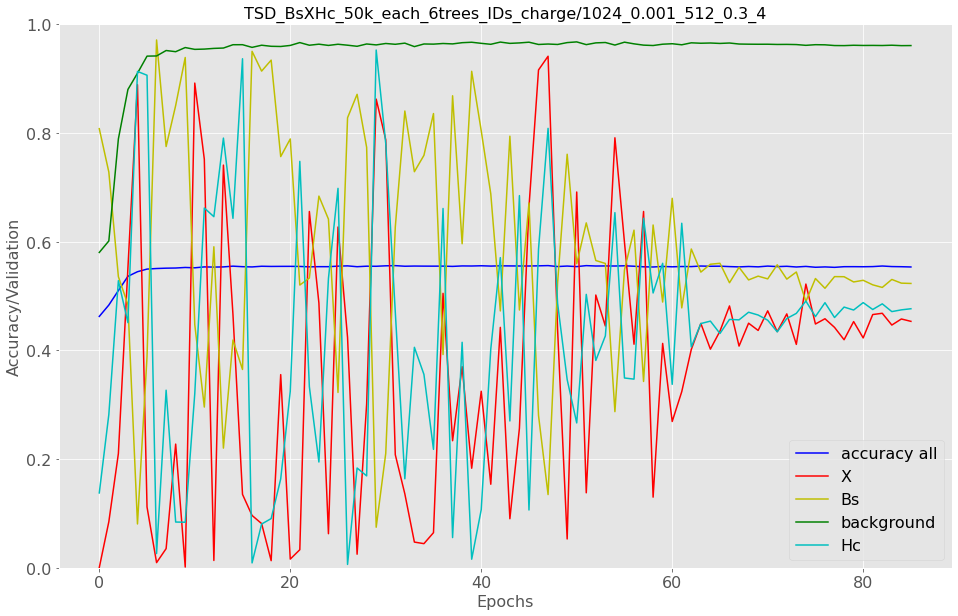

In [30]:
import matplotlib.pyplot as plt
title=(data_name + '/' + spec)
ylabel="Accuracy/Validation"
font = 16
plot_name = "accuracies_" + plotname_extension

name=plt.figure(figsize=(16,10))#figsize=(3.487,3.487/1.618))
ax =plt.gca()

#set ylim lower bound to zero
plt.gca().set_ylim(bottom=0)
#plt.gca().set_xlim(left=0)


acc_all.plot(x="Step", y="Value", color='b', ax=ax, alpha=1, label="accuracy all")
acc_0.plot(x="Step", y="Value", color='r', ax=ax, alpha=1, label="X" )
acc_1.plot(x="Step", y="Value", color='y', ax=ax, alpha=1, label="Bs" )
acc_2.plot(x="Step", y="Value", color='g', ax=ax, alpha=1, label="background" )
acc_3.plot(x="Step", y="Value", color='c', ax=ax, alpha=1, label="Hc" )
#df3.plot(x="Step", y="Value", color='g', ax=ax, alpha=0.7, label=data3)
name= plt.xlabel('Epochs', fontsize=font)
name= plt.ylabel(ylabel, fontsize=font)
name= plt.title(title, fontsize=font)
name = plt.xticks(fontsize=font, rotation=360)
name =  plt.yticks(fontsize=font, rotation=360)
name= plt.legend(fontsize=font)

plt.savefig(plot_path/ (plot_name + '.pdf'))


In [ ]:
# the actual plots
# bar plot
steps = math.ceil(len(longest_run)/10)
steps = int(math.ceil(steps / 5.0)) * 5
multi_metric_bar_plot(longest_run, plot_path, ('barplot_metrics_' + plotname_extension), data_type="Validation", step=steps, metric_type="SA", title=plotname_extension)


# loss plot
loss_tr = longest_run['Cross Entropy/Training']
loss_val = longest_run['Cross Entropy/Validation']
curve_plot(loss_tr, loss_val, plot_path, ('loss_comparison_' + plotname_extension), 'Cross_Entropy', ('Loss / ' + plotname_extension))

# perfect SA plot
pLCA_tr = longest_run['PerfectSA/Training']
pLCA_val = longest_run['PerfectSA/Validation']
curve_plot(pLCA_tr, pLCA_val, plot_path, ('perfectSA_comparison_' + plotname_extension), 'PerfectSA', ('PerfectSA / ' + plotname_extension))

